Decision Tree and Naive Bayes classifiers using Plurality Prediction

Accuracy: 0.7660550458715596
Precision: 0.8106524699518861
Recall: 0.7660550458715596
F1 Score: 0.7699701249475592
AUC: 0.830442820347657
V Score: 0.6502457317666633


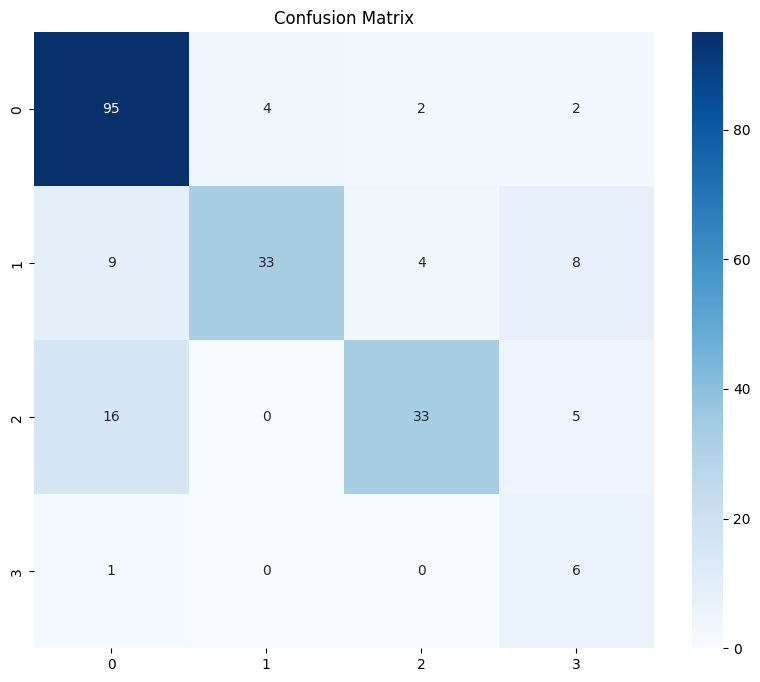

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load the dataset into a pandas DataFrame
dataset_path = r'C:\Users\tahsi\OneDrive\Desktop\python_ws\dataset_NoPCA.csv'
df = pd.read_csv(dataset_path)

# Separate the features and target variable
X = df.drop('classification', axis=1)
y = df['classification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the individual classifiers
dt_classifier = DecisionTreeClassifier()
nb_classifier = GaussianNB()

dt_classifier.fit(X_train, y_train)
nb_classifier.fit(X_train, y_train)

# Make predictions using the individual classifiers
dt_pred = dt_classifier.predict(X_test)
nb_pred = nb_classifier.predict(X_test)

# Perform Plurality Prediction
pred = []
for i in range(len(X_test)):
    votes = [dt_pred[i], nb_pred[i]]  # List of predictions from individual classifiers
    pred.append(max(set(votes), key=votes.count))  # Select the most frequent prediction

# Calculate accuracy, precision, recall, F1 score, AUC, and V score
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')
f1 = f1_score(y_test, pred, average='weighted')
auc = roc_auc_score(pd.get_dummies(y_test).values, pd.get_dummies(pred).values, multi_class='ovr')
v_score = matthews_corrcoef(y_test, pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", auc)
print("V Score:", v_score)

# Calculate and visualize the confusion matrix
confusion_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.show()
